<a href="https://colab.research.google.com/github/InvestitoreComune/analysis/blob/main/backtesting_oro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BACKTESTING: 60/40 TRADIZIONALE VS 50/10/40 CON ORO

Periodo analisi: 2004-11-18 - 2025-11-24

Portafogli confrontati:
  📊 60/40 Tradizionale:    60% Azioni + 40% Obbligazioni
  🥇 50/10/40 Con Oro:      50% Azioni + 10% Oro + 40% Obbligazioni

Differenza: -10% Azioni, +10% Oro

DOWNLOAD DATI STORICI
✅ Dati scaricati: 5287 giorni di trading
   Periodo: 2004-11-18 → 2025-11-21

📊 Statistiche Base Asset (periodo completo):
   S&P 500 (Azioni USA)     : + 719.6% totale, CAGR 10.53%
   Oro (Gold ETC)           : + 743.3% totale, CAGR 10.68%
   Treasury USA 7-10Y       : +  98.0% totale, CAGR  3.31%

✅ Calcolati 252 rendimenti mensili

CALCOLO RENDIMENTI PORTAFOGLI
✅ Rendimenti portafogli calcolati

PERFORMANCE CUMULATIVA (PERIODO COMPLETO)

📊 RISULTATI PERIODO COMPLETO (20.9 anni):

Metrica                        60/40 Trad    50/10/40 Oro      Differenza
----------------------------------------------------------------------
Capitale finale (10k€)             50,375€          51,556€       

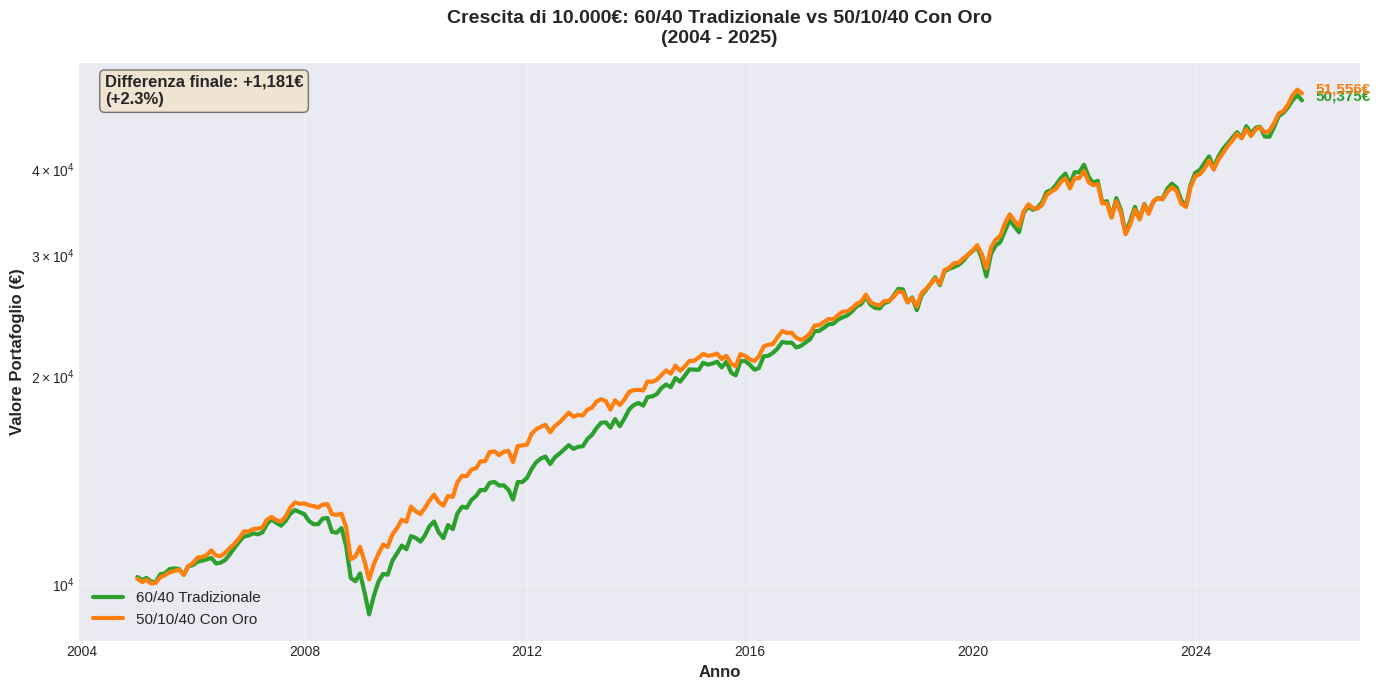

✅ Grafico performance cumulativa generato!


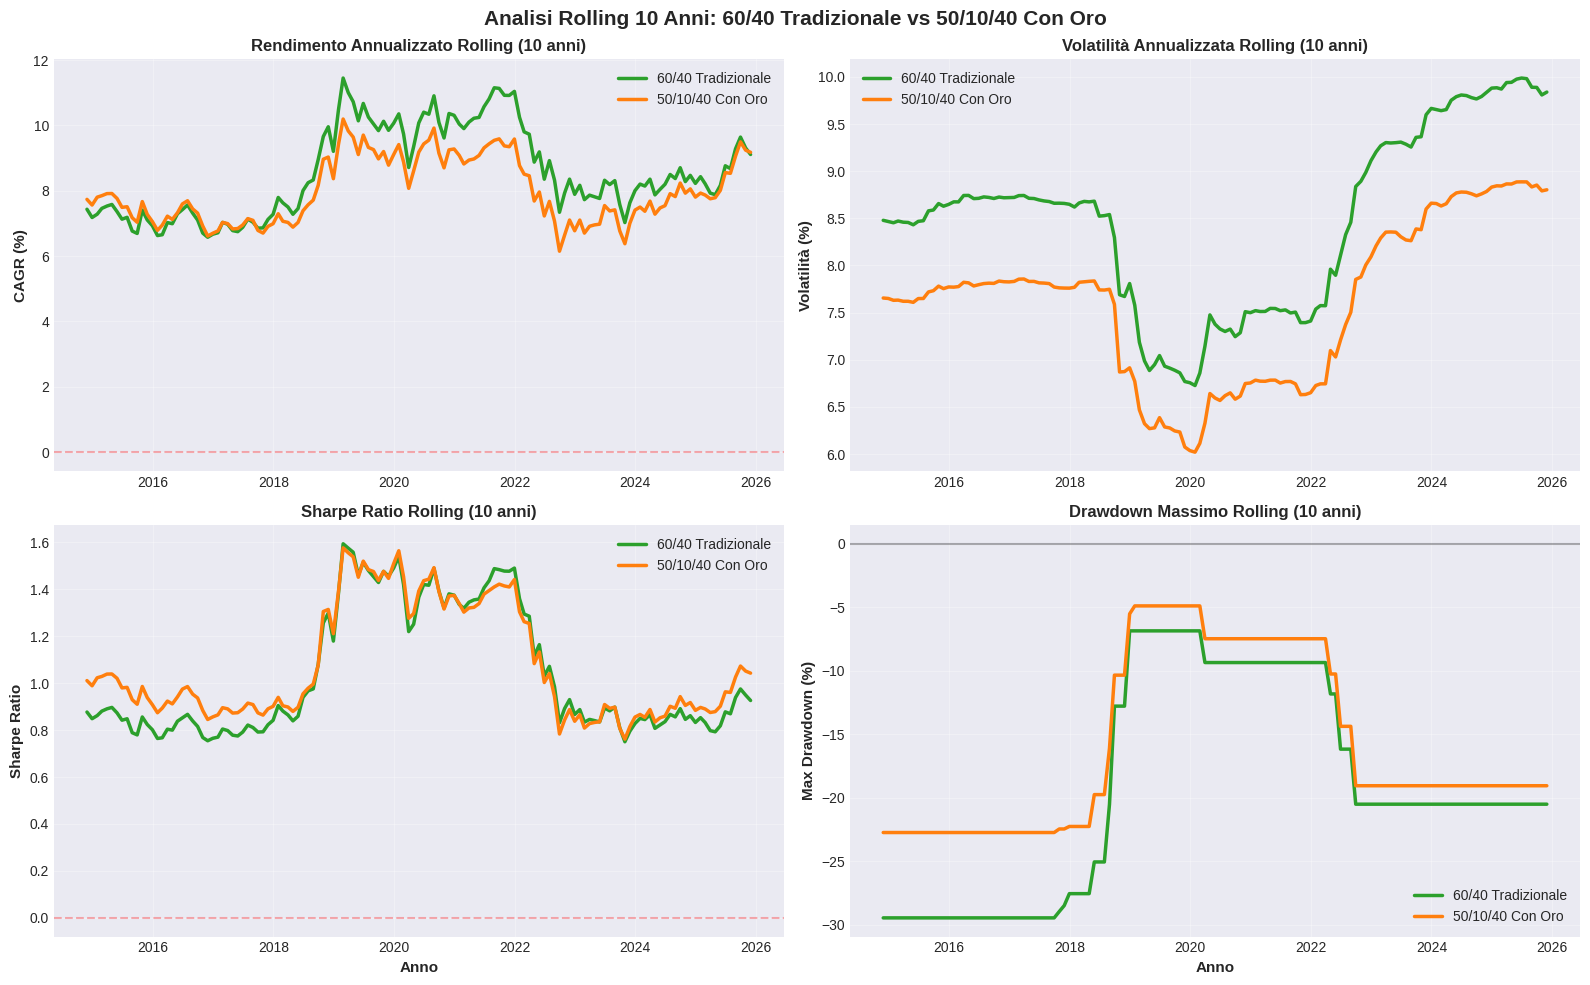

✅ Grafici rolling generati!


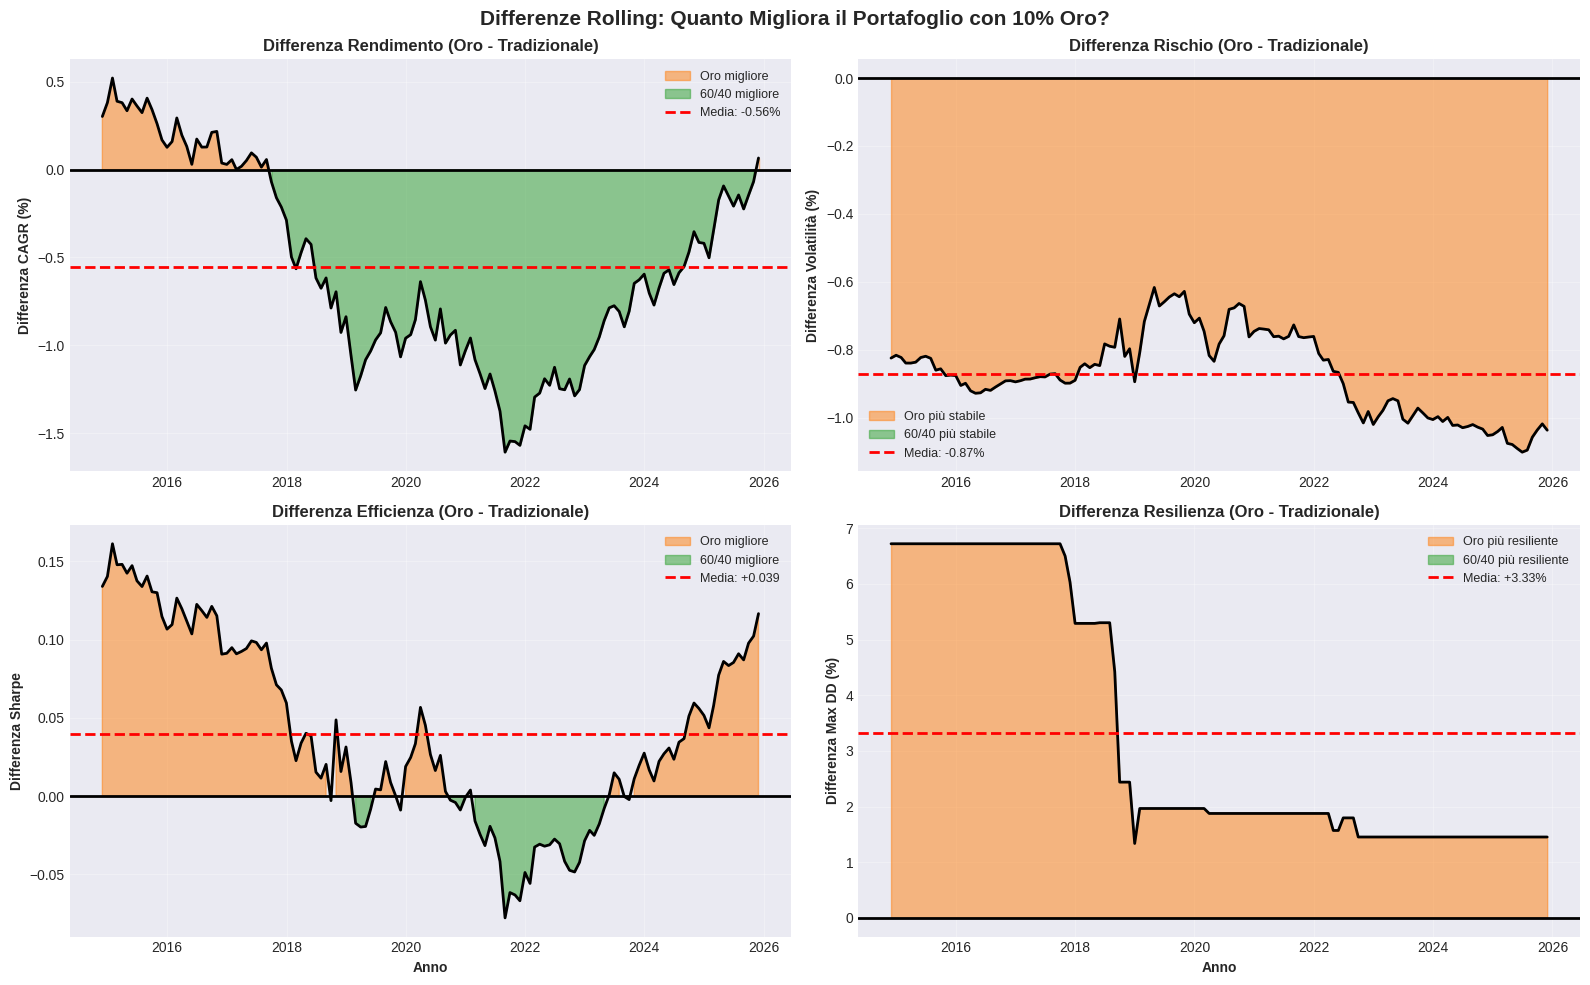

✅ Grafici differenze generati!


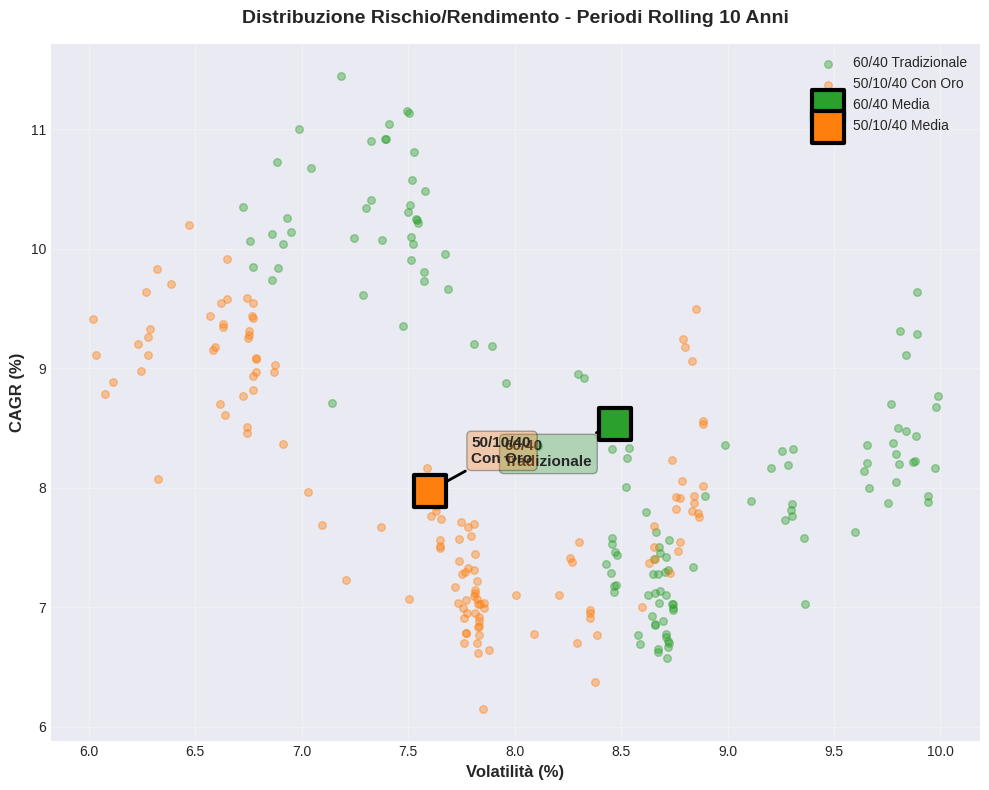

✅ Scatter plot generato!


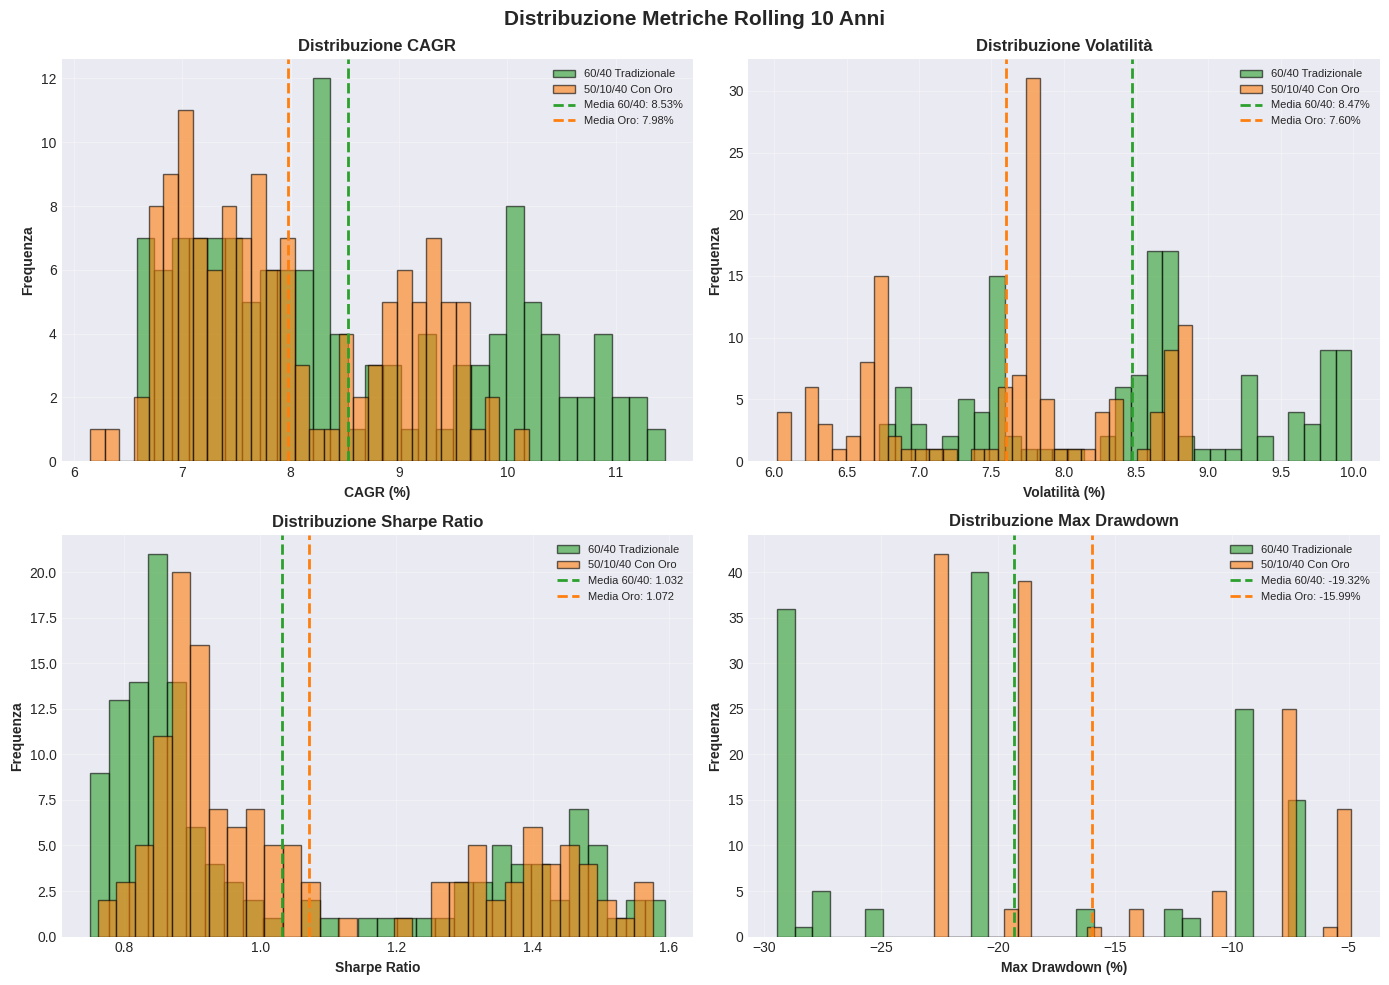

✅ Istogrammi distribuzioni generati!

ANALISI PERIODI CRITICI

📈 TOP 5 MIGLIORI PERIODI (CAGR rolling 10Y):

60/40 Tradizionale:
   2009-02 → 2019-02:  11.45%
   2011-08 → 2021-08:  11.15%
   2011-09 → 2021-09:  11.13%
   2011-12 → 2021-12:  11.04%
   2009-03 → 2019-03:  11.01%

50/10/40 Con Oro:
   2009-02 → 2019-02:  10.20%
   2010-08 → 2020-08:   9.92%
   2009-03 → 2019-03:   9.83%
   2009-06 → 2019-06:   9.70%
   2009-04 → 2019-04:   9.64%

📉 TOP 5 PEGGIORI PERIODI (CAGR rolling 10Y):

60/40 Tradizionale:
   2006-11 → 2016-11:   6.58%
   2006-01 → 2016-01:   6.63%
   2006-02 → 2016-02:   6.66%
   2006-12 → 2016-12:   6.67%
   2005-09 → 2015-09:   6.69%

50/10/40 Con Oro:
   2012-09 → 2022-09:   6.15%
   2013-10 → 2023-10:   6.38%
   2006-11 → 2016-11:   6.62%
   2012-10 → 2022-10:   6.64%
   2006-12 → 2016-12:   6.70%

💥 DRAWDOWN PEGGIORI:

60/40 Tradizionale: -29.46%
   Periodo: 2005-04 → 2015-04

50/10/40 Con Oro: -22.74%
   Periodo: 2005-11 → 2015-11

🏆 VERDICT FINALE

📊 CONFRON

In [6]:
# Installazione dipendenze
!pip install yfinance -q

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurazione visualizzazione Colab
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.style.use('seaborn-v0_8-darkgrid')

# ============================================
# CONFIGURAZIONE
# ============================================

print("=" * 70)
print("BACKTESTING: 60/40 TRADIZIONALE VS 50/10/40 CON ORO")
print("=" * 70)

# Ticker
TICKERS = {
    'SPY': 'S&P 500 (Azioni USA)',
    'GLD': 'Oro (Gold ETC)',
    'IEF': 'Treasury USA 7-10Y'
}

START_DATE = '2004-11-18'  # Data lancio GLD
END_DATE = datetime.now().strftime('%Y-%m-%d')

# I DUE PORTAFOGLI DA CONFRONTARE
PORTFOLIOS = {
    '60/40 Azioni-Obb': {
        'SPY': 0.60,
        'GLD': 0.00,
        'IEF': 0.40
    },
    '50/10/40 Con Oro': {
        'SPY': 0.50,
        'GLD': 0.10,
        'IEF': 0.40
    }
}

# Colori
COLOR_TRAD = '#2ca02c'  # Verde per 60/40 tradizionale
COLOR_ORO = '#ff7f0e'   # Arancione per 50/10/40 con oro

print(f"\nPeriodo analisi: {START_DATE} - {END_DATE}")
print(f"\nPortafogli confrontati:")
print(f"  📊 60/40 Tradizionale:    60% Azioni + 40% Obbligazioni")
print(f"  🥇 50/10/40 Con Oro:      50% Azioni + 10% Oro + 40% Obbligazioni")
print(f"\nDifferenza: -10% Azioni, +10% Oro")

# ============================================
# STEP 1: DOWNLOAD DATI
# ============================================

print("\n" + "=" * 70)
print("DOWNLOAD DATI STORICI")
print("=" * 70)

try:
    data = yf.download(
        list(TICKERS.keys()),
        start=START_DATE,
        end=END_DATE,
        progress=False
    )['Close']

    if isinstance(data, pd.Series):
        data = data.to_frame()

    print(f"✅ Dati scaricati: {len(data)} giorni di trading")
    print(f"   Periodo: {data.index[0].date()} → {data.index[-1].date()}")

    # Mostra statistiche base asset
    print(f"\n📊 Statistiche Base Asset (periodo completo):")
    for ticker, name in TICKERS.items():
        start_price = data[ticker].iloc[0]
        end_price = data[ticker].iloc[-1]
        total_return = (end_price / start_price - 1) * 100
        years = (data.index[-1] - data.index[0]).days / 365.25
        cagr = (end_price / start_price) ** (1/years) - 1
        print(f"   {name:25s}: +{total_return:6.1f}% totale, CAGR {cagr*100:5.2f}%")

except Exception as e:
    print(f"❌ Errore: {e}")
    raise

# Rendimenti mensili
returns_monthly = data.resample('M').last().pct_change().dropna()
print(f"\n✅ Calcolati {len(returns_monthly)} rendimenti mensili")

# ============================================
# STEP 2: CALCOLA RENDIMENTI PORTAFOGLI
# ============================================

print("\n" + "=" * 70)
print("CALCOLO RENDIMENTI PORTAFOGLI")
print("=" * 70)

portfolio_returns = pd.DataFrame(index=returns_monthly.index)

for port_name, weights in PORTFOLIOS.items():
    port_ret = sum(returns_monthly[ticker] * weight
                   for ticker, weight in weights.items())
    portfolio_returns[port_name] = port_ret

print("✅ Rendimenti portafogli calcolati")

# ============================================
# STEP 3: PERFORMANCE CUMULATIVA
# ============================================

print("\n" + "=" * 70)
print("PERFORMANCE CUMULATIVA (PERIODO COMPLETO)")
print("=" * 70)

# Calcola crescita di 10.000€
initial_capital = 10000
cumulative_trad = (1 + portfolio_returns['60/40 Azioni-Obb']).cumprod() * initial_capital
cumulative_oro = (1 + portfolio_returns['50/10/40 Con Oro']).cumprod() * initial_capital

# Statistiche periodo completo
years = (portfolio_returns.index[-1] - portfolio_returns.index[0]).days / 365.25

cagr_trad = (cumulative_trad.iloc[-1] / initial_capital) ** (1/years) - 1
cagr_oro = (cumulative_oro.iloc[-1] / initial_capital) ** (1/years) - 1

vol_trad = portfolio_returns['60/40 Azioni-Obb'].std() * np.sqrt(12)
vol_oro = portfolio_returns['50/10/40 Con Oro'].std() * np.sqrt(12)

sharpe_trad = cagr_trad / vol_trad
sharpe_oro = cagr_oro / vol_oro

# Calcola max drawdown
def calculate_max_drawdown(returns):
    cum_returns = (1 + returns).cumprod()
    running_max = cum_returns.expanding().max()
    drawdown = (cum_returns - running_max) / running_max
    return drawdown.min()

dd_trad = calculate_max_drawdown(portfolio_returns['60/40 Azioni-Obb'])
dd_oro = calculate_max_drawdown(portfolio_returns['50/10/40 Con Oro'])

print(f"\n📊 RISULTATI PERIODO COMPLETO ({years:.1f} anni):")
print(f"\n{'Metrica':<25s} {'60/40 Trad':>15s} {'50/10/40 Oro':>15s} {'Differenza':>15s}")
print("-" * 70)
print(f"{'Capitale finale (10k€)':<25s} {cumulative_trad.iloc[-1]:>15,.0f}€ {cumulative_oro.iloc[-1]:>15,.0f}€ {cumulative_oro.iloc[-1]-cumulative_trad.iloc[-1]:>+14,.0f}€")
print(f"{'CAGR':<25s} {cagr_trad*100:>14.2f}% {cagr_oro*100:>14.2f}% {(cagr_oro-cagr_trad)*100:>+14.2f}%")
print(f"{'Volatilità':<25s} {vol_trad*100:>14.2f}% {vol_oro*100:>14.2f}% {(vol_oro-vol_trad)*100:>+14.2f}%")
print(f"{'Sharpe Ratio':<25s} {sharpe_trad:>15.3f} {sharpe_oro:>15.3f} {sharpe_oro-sharpe_trad:>+15.3f}")
print(f"{'Max Drawdown':<25s} {dd_trad*100:>14.2f}% {dd_oro*100:>14.2f}% {(dd_oro-dd_trad)*100:>+14.2f}%")

# ============================================
# STEP 4: ANALISI ROLLING 10 ANNI
# ============================================

print("\n" + "=" * 70)
print("ANALISI ROLLING 10 ANNI")
print("=" * 70)

window = 120  # 10 anni in mesi

def calculate_rolling_cagr(returns_series, window=120):
    """CAGR annualizzato rolling"""
    return returns_series.rolling(window=window).apply(
        lambda x: (1 + x).prod() ** (12 / len(x)) - 1,
        raw=False
    )

def calculate_rolling_volatility(returns_series, window=120):
    """Volatilità annualizzata rolling"""
    return returns_series.rolling(window=window).std() * np.sqrt(12)

def calculate_rolling_sharpe(returns_series, window=120):
    """Sharpe ratio rolling"""
    rolling_cagr = calculate_rolling_cagr(returns_series, window)
    rolling_vol = calculate_rolling_volatility(returns_series, window)
    return rolling_cagr / rolling_vol

def calculate_rolling_max_drawdown(returns_series, window=120):
    """Drawdown massimo rolling"""
    def max_dd(rets):
        cum = (1 + rets).cumprod()
        running_max = cum.expanding().max()
        dd = (cum - running_max) / running_max
        return dd.min()

    return returns_series.rolling(window=window).apply(max_dd, raw=False)

print("⏳ Calcolo metriche rolling...")

# Calcola tutte le metriche
rolling_cagr_trad = calculate_rolling_cagr(portfolio_returns['60/40 Azioni-Obb'], window)
rolling_cagr_oro = calculate_rolling_cagr(portfolio_returns['50/10/40 Con Oro'], window)

rolling_vol_trad = calculate_rolling_volatility(portfolio_returns['60/40 Azioni-Obb'], window)
rolling_vol_oro = calculate_rolling_volatility(portfolio_returns['50/10/40 Con Oro'], window)

rolling_sharpe_trad = calculate_rolling_sharpe(portfolio_returns['60/40 Azioni-Obb'], window)
rolling_sharpe_oro = calculate_rolling_sharpe(portfolio_returns['50/10/40 Con Oro'], window)

rolling_dd_trad = calculate_rolling_max_drawdown(portfolio_returns['60/40 Azioni-Obb'], window)
rolling_dd_oro = calculate_rolling_max_drawdown(portfolio_returns['50/10/40 Con Oro'], window)

print("✅ Metriche rolling calcolate!")

# Statistiche rolling
print(f"\n📊 STATISTICHE ROLLING 10 ANNI (medie):")
print(f"\n{'Metrica':<25s} {'60/40 Trad':>15s} {'50/10/40 Oro':>15s} {'Differenza':>15s}")
print("-" * 70)
print(f"{'CAGR medio':<25s} {rolling_cagr_trad.mean()*100:>14.2f}% {rolling_cagr_oro.mean()*100:>14.2f}% {(rolling_cagr_oro.mean()-rolling_cagr_trad.mean())*100:>+14.2f}%")
print(f"{'CAGR minimo':<25s} {rolling_cagr_trad.min()*100:>14.2f}% {rolling_cagr_oro.min()*100:>14.2f}% {(rolling_cagr_oro.min()-rolling_cagr_trad.min())*100:>+14.2f}%")
print(f"{'CAGR massimo':<25s} {rolling_cagr_trad.max()*100:>14.2f}% {rolling_cagr_oro.max()*100:>14.2f}% {(rolling_cagr_oro.max()-rolling_cagr_trad.max())*100:>+14.2f}%")
print()
print(f"{'Volatilità media':<25s} {rolling_vol_trad.mean()*100:>14.2f}% {rolling_vol_oro.mean()*100:>14.2f}% {(rolling_vol_oro.mean()-rolling_vol_trad.mean())*100:>+14.2f}%")
print(f"{'Volatilità min':<25s} {rolling_vol_trad.min()*100:>14.2f}% {rolling_vol_oro.min()*100:>14.2f}% {(rolling_vol_oro.min()-rolling_vol_trad.min())*100:>+14.2f}%")
print(f"{'Volatilità max':<25s} {rolling_vol_trad.max()*100:>14.2f}% {rolling_vol_oro.max()*100:>14.2f}% {(rolling_vol_oro.max()-rolling_vol_trad.max())*100:>+14.2f}%")
print()
print(f"{'Sharpe medio':<25s} {rolling_sharpe_trad.mean():>15.3f} {rolling_sharpe_oro.mean():>15.3f} {rolling_sharpe_oro.mean()-rolling_sharpe_trad.mean():>+15.3f}")
print(f"{'Sharpe minimo':<25s} {rolling_sharpe_trad.min():>15.3f} {rolling_sharpe_oro.min():>15.3f} {rolling_sharpe_oro.min()-rolling_sharpe_trad.min():>+15.3f}")
print(f"{'Sharpe massimo':<25s} {rolling_sharpe_trad.max():>15.3f} {rolling_sharpe_oro.max():>15.3f} {rolling_sharpe_oro.max()-rolling_sharpe_trad.max():>+15.3f}")
print()
print(f"{'Max DD medio':<25s} {rolling_dd_trad.mean()*100:>14.2f}% {rolling_dd_oro.mean()*100:>14.2f}% {(rolling_dd_oro.mean()-rolling_dd_trad.mean())*100:>+14.2f}%")
print(f"{'Max DD peggiore':<25s} {rolling_dd_trad.min()*100:>14.2f}% {rolling_dd_oro.min()*100:>14.2f}% {(rolling_dd_oro.min()-rolling_dd_trad.min())*100:>+14.2f}%")

# Percentuale periodi migliori
pct_cagr_better = (rolling_cagr_oro > rolling_cagr_trad).sum() / rolling_cagr_oro.notna().sum() * 100
pct_vol_better = (rolling_vol_oro < rolling_vol_trad).sum() / rolling_vol_oro.notna().sum() * 100
pct_sharpe_better = (rolling_sharpe_oro > rolling_sharpe_trad).sum() / rolling_sharpe_oro.notna().sum() * 100
pct_dd_better = (rolling_dd_oro > rolling_dd_trad).sum() / rolling_dd_oro.notna().sum() * 100

print(f"\n📊 PERCENTUALE PERIODI IN CUI ORO È MIGLIORE:")
print(f"   CAGR superiore:        {pct_cagr_better:5.1f}% dei periodi")
print(f"   Volatilità inferiore:  {pct_vol_better:5.1f}% dei periodi")
print(f"   Sharpe superiore:      {pct_sharpe_better:5.1f}% dei periodi")
print(f"   Drawdown minore:       {pct_dd_better:5.1f}% dei periodi")

# ============================================
# STEP 5: GRAFICI PRINCIPALI
# ============================================

print("\n" + "=" * 70)
print("GENERAZIONE GRAFICI")
print("=" * 70)

# === GRAFICO 1: Performance Cumulativa ===
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(cumulative_trad.index, cumulative_trad,
       label='60/40 Tradizionale', linewidth=3, color=COLOR_TRAD)
ax.plot(cumulative_oro.index, cumulative_oro,
       label='50/10/40 Con Oro', linewidth=3, color=COLOR_ORO)

# Annotazioni finali
ax.annotate(f'{cumulative_trad.iloc[-1]:,.0f}€',
           xy=(cumulative_trad.index[-1], cumulative_trad.iloc[-1]),
           xytext=(10, 0), textcoords='offset points',
           fontsize=11, fontweight='bold', color=COLOR_TRAD)
ax.annotate(f'{cumulative_oro.iloc[-1]:,.0f}€',
           xy=(cumulative_oro.index[-1], cumulative_oro.iloc[-1]),
           xytext=(10, 0), textcoords='offset points',
           fontsize=11, fontweight='bold', color=COLOR_ORO)

ax.set_xlabel('Anno', fontsize=12, fontweight='bold')
ax.set_ylabel('Valore Portafoglio (€)', fontsize=12, fontweight='bold')
ax.set_title(f'Crescita di 10.000€: 60/40 Tradizionale vs 50/10/40 Con Oro\n({START_DATE[:4]} - {END_DATE[:4]})',
            fontsize=14, fontweight='bold', pad=15)
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_yscale('log')  # Scala logaritmica

# Differenza finale
diff_finale = cumulative_oro.iloc[-1] - cumulative_trad.iloc[-1]
ax.text(0.02, 0.98,
       f'Differenza finale: {diff_finale:+,.0f}€\n({(cumulative_oro.iloc[-1]/cumulative_trad.iloc[-1]-1)*100:+.1f}%)',
       transform=ax.transAxes,
       fontsize=12, fontweight='bold',
       verticalalignment='top',
       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("✅ Grafico performance cumulativa generato!")

# === GRAFICO 2: Analisi Rolling (2x2) ===
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Analisi Rolling 10 Anni: 60/40 Tradizionale vs 50/10/40 Con Oro',
             fontsize=15, fontweight='bold')

# CAGR Rolling
ax1 = axes[0, 0]
ax1.plot(rolling_cagr_trad.index, rolling_cagr_trad * 100,
        label='60/40 Tradizionale', linewidth=2.5, color=COLOR_TRAD)
ax1.plot(rolling_cagr_oro.index, rolling_cagr_oro * 100,
        label='50/10/40 Con Oro', linewidth=2.5, color=COLOR_ORO)
ax1.set_ylabel('CAGR (%)', fontweight='bold', fontsize=11)
ax1.set_title('Rendimento Annualizzato Rolling (10 anni)', fontweight='bold', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.3)

# Volatilità Rolling
ax2 = axes[0, 1]
ax2.plot(rolling_vol_trad.index, rolling_vol_trad * 100,
        label='60/40 Tradizionale', linewidth=2.5, color=COLOR_TRAD)
ax2.plot(rolling_vol_oro.index, rolling_vol_oro * 100,
        label='50/10/40 Con Oro', linewidth=2.5, color=COLOR_ORO)
ax2.set_ylabel('Volatilità (%)', fontweight='bold', fontsize=11)
ax2.set_title('Volatilità Annualizzata Rolling (10 anni)', fontweight='bold', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Sharpe Rolling
ax3 = axes[1, 0]
ax3.plot(rolling_sharpe_trad.index, rolling_sharpe_trad,
        label='60/40 Tradizionale', linewidth=2.5, color=COLOR_TRAD)
ax3.plot(rolling_sharpe_oro.index, rolling_sharpe_oro,
        label='50/10/40 Con Oro', linewidth=2.5, color=COLOR_ORO)
ax3.set_xlabel('Anno', fontweight='bold', fontsize=11)
ax3.set_ylabel('Sharpe Ratio', fontweight='bold', fontsize=11)
ax3.set_title('Sharpe Ratio Rolling (10 anni)', fontweight='bold', fontsize=12)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='red', linestyle='--', alpha=0.3)

# Max Drawdown Rolling
ax4 = axes[1, 1]
ax4.plot(rolling_dd_trad.index, rolling_dd_trad * 100,
        label='60/40 Tradizionale', linewidth=2.5, color=COLOR_TRAD)
ax4.plot(rolling_dd_oro.index, rolling_dd_oro * 100,
        label='50/10/40 Con Oro', linewidth=2.5, color=COLOR_ORO)
ax4.set_xlabel('Anno', fontweight='bold', fontsize=11)
ax4.set_ylabel('Max Drawdown (%)', fontweight='bold', fontsize=11)
ax4.set_title('Drawdown Massimo Rolling (10 anni)', fontweight='bold', fontsize=12)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Grafici rolling generati!")

# === GRAFICO 3: Differenze Rolling ===
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Differenze Rolling: Quanto Migliora il Portafoglio con 10% Oro?',
             fontsize=15, fontweight='bold')

# Differenza CAGR
ax1 = axes[0, 0]
diff_cagr = (rolling_cagr_oro - rolling_cagr_trad) * 100
ax1.fill_between(diff_cagr.index, diff_cagr, 0,
                where=(diff_cagr >= 0), color=COLOR_ORO, alpha=0.5, label='Oro migliore')
ax1.fill_between(diff_cagr.index, diff_cagr, 0,
                where=(diff_cagr < 0), color=COLOR_TRAD, alpha=0.5, label='60/40 migliore')
ax1.plot(diff_cagr.index, diff_cagr, color='black', linewidth=2)
ax1.axhline(y=0, color='black', linewidth=2)
ax1.axhline(y=diff_cagr.mean(), color='red', linestyle='--', linewidth=2,
           label=f'Media: {diff_cagr.mean():+.2f}%')
ax1.set_ylabel('Differenza CAGR (%)', fontweight='bold')
ax1.set_title('Differenza Rendimento (Oro - Tradizionale)', fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Differenza Volatilità
ax2 = axes[0, 1]
diff_vol = (rolling_vol_oro - rolling_vol_trad) * 100
ax2.fill_between(diff_vol.index, diff_vol, 0,
                where=(diff_vol <= 0), color=COLOR_ORO, alpha=0.5, label='Oro più stabile')
ax2.fill_between(diff_vol.index, diff_vol, 0,
                where=(diff_vol > 0), color=COLOR_TRAD, alpha=0.5, label='60/40 più stabile')
ax2.plot(diff_vol.index, diff_vol, color='black', linewidth=2)
ax2.axhline(y=0, color='black', linewidth=2)
ax2.axhline(y=diff_vol.mean(), color='red', linestyle='--', linewidth=2,
           label=f'Media: {diff_vol.mean():+.2f}%')
ax2.set_ylabel('Differenza Volatilità (%)', fontweight='bold')
ax2.set_title('Differenza Rischio (Oro - Tradizionale)', fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# Differenza Sharpe
ax3 = axes[1, 0]
diff_sharpe = rolling_sharpe_oro - rolling_sharpe_trad
ax3.fill_between(diff_sharpe.index, diff_sharpe, 0,
                where=(diff_sharpe >= 0), color=COLOR_ORO, alpha=0.5, label='Oro migliore')
ax3.fill_between(diff_sharpe.index, diff_sharpe, 0,
                where=(diff_sharpe < 0), color=COLOR_TRAD, alpha=0.5, label='60/40 migliore')
ax3.plot(diff_sharpe.index, diff_sharpe, color='black', linewidth=2)
ax3.axhline(y=0, color='black', linewidth=2)
ax3.axhline(y=diff_sharpe.mean(), color='red', linestyle='--', linewidth=2,
           label=f'Media: {diff_sharpe.mean():+.3f}')
ax3.set_xlabel('Anno', fontweight='bold')
ax3.set_ylabel('Differenza Sharpe', fontweight='bold')
ax3.set_title('Differenza Efficienza (Oro - Tradizionale)', fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# Differenza Drawdown
ax4 = axes[1, 1]
diff_dd = (rolling_dd_oro - rolling_dd_trad) * 100
ax4.fill_between(diff_dd.index, diff_dd, 0,
                where=(diff_dd >= 0), color=COLOR_ORO, alpha=0.5, label='Oro più resiliente')
ax4.fill_between(diff_dd.index, diff_dd, 0,
                where=(diff_dd < 0), color=COLOR_TRAD, alpha=0.5, label='60/40 più resiliente')
ax4.plot(diff_dd.index, diff_dd, color='black', linewidth=2)
ax4.axhline(y=0, color='black', linewidth=2)
ax4.axhline(y=diff_dd.mean(), color='red', linestyle='--', linewidth=2,
           label=f'Media: {diff_dd.mean():+.2f}%')
ax4.set_xlabel('Anno', fontweight='bold')
ax4.set_ylabel('Differenza Max DD (%)', fontweight='bold')
ax4.set_title('Differenza Resilienza (Oro - Tradizionale)', fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Grafici differenze generati!")

# === GRAFICO 4: Scatter Risk/Return ===
fig, ax = plt.subplots(figsize=(10, 8))

# Plot di ogni punto rolling
ax.scatter(rolling_vol_trad * 100, rolling_cagr_trad * 100,
          s=30, alpha=0.4, color=COLOR_TRAD, label='60/40 Tradizionale')
ax.scatter(rolling_vol_oro * 100, rolling_cagr_oro * 100,
          s=30, alpha=0.4, color=COLOR_ORO, label='50/10/40 Con Oro')

# Medie
ax.scatter(rolling_vol_trad.mean() * 100, rolling_cagr_trad.mean() * 100,
          s=500, marker='s', color=COLOR_TRAD, edgecolors='black', linewidth=3,
          label='60/40 Media', zorder=5)
ax.scatter(rolling_vol_oro.mean() * 100, rolling_cagr_oro.mean() * 100,
          s=500, marker='s', color=COLOR_ORO, edgecolors='black', linewidth=3,
          label='50/10/40 Media', zorder=5)

# Annotazioni medie
ax.annotate('60/40\nTradizionale',
           (rolling_vol_trad.mean() * 100, rolling_cagr_trad.mean() * 100),
           xytext=(-80, -30), textcoords='offset points',
           fontsize=11, fontweight='bold',
           bbox=dict(boxstyle='round', facecolor=COLOR_TRAD, alpha=0.3),
           arrowprops=dict(arrowstyle='->', lw=2))
ax.annotate('50/10/40\nCon Oro',
           (rolling_vol_oro.mean() * 100, rolling_cagr_oro.mean() * 100),
           xytext=(30, 20), textcoords='offset points',
           fontsize=11, fontweight='bold',
           bbox=dict(boxstyle='round', facecolor=COLOR_ORO, alpha=0.3),
           arrowprops=dict(arrowstyle='->', lw=2))

ax.set_xlabel('Volatilità (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('CAGR (%)', fontsize=12, fontweight='bold')
ax.set_title('Distribuzione Rischio/Rendimento - Periodi Rolling 10 Anni',
            fontsize=14, fontweight='bold', pad=15)
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Scatter plot generato!")

# === GRAFICO 5: Distribuzione Metriche ===
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribuzione Metriche Rolling 10 Anni', fontsize=15, fontweight='bold')

# CAGR Distribution
ax1 = axes[0, 0]
ax1.hist(rolling_cagr_trad.dropna() * 100, bins=30, alpha=0.6,
        color=COLOR_TRAD, label='60/40 Tradizionale', edgecolor='black')
ax1.hist(rolling_cagr_oro.dropna() * 100, bins=30, alpha=0.6,
        color=COLOR_ORO, label='50/10/40 Con Oro', edgecolor='black')
ax1.axvline(rolling_cagr_trad.mean() * 100, color=COLOR_TRAD,
           linestyle='--', linewidth=2, label=f'Media 60/40: {rolling_cagr_trad.mean()*100:.2f}%')
ax1.axvline(rolling_cagr_oro.mean() * 100, color=COLOR_ORO,
           linestyle='--', linewidth=2, label=f'Media Oro: {rolling_cagr_oro.mean()*100:.2f}%')
ax1.set_xlabel('CAGR (%)', fontweight='bold')
ax1.set_ylabel('Frequenza', fontweight='bold')
ax1.set_title('Distribuzione CAGR', fontweight='bold')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

# Volatility Distribution
ax2 = axes[0, 1]
ax2.hist(rolling_vol_trad.dropna() * 100, bins=30, alpha=0.6,
        color=COLOR_TRAD, label='60/40 Tradizionale', edgecolor='black')
ax2.hist(rolling_vol_oro.dropna() * 100, bins=30, alpha=0.6,
        color=COLOR_ORO, label='50/10/40 Con Oro', edgecolor='black')
ax2.axvline(rolling_vol_trad.mean() * 100, color=COLOR_TRAD,
           linestyle='--', linewidth=2, label=f'Media 60/40: {rolling_vol_trad.mean()*100:.2f}%')
ax2.axvline(rolling_vol_oro.mean() * 100, color=COLOR_ORO,
           linestyle='--', linewidth=2, label=f'Media Oro: {rolling_vol_oro.mean()*100:.2f}%')
ax2.set_xlabel('Volatilità (%)', fontweight='bold')
ax2.set_ylabel('Frequenza', fontweight='bold')
ax2.set_title('Distribuzione Volatilità', fontweight='bold')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)

# Sharpe Distribution
ax3 = axes[1, 0]
ax3.hist(rolling_sharpe_trad.dropna(), bins=30, alpha=0.6,
        color=COLOR_TRAD, label='60/40 Tradizionale', edgecolor='black')
ax3.hist(rolling_sharpe_oro.dropna(), bins=30, alpha=0.6,
        color=COLOR_ORO, label='50/10/40 Con Oro', edgecolor='black')
ax3.axvline(rolling_sharpe_trad.mean(), color=COLOR_TRAD,
           linestyle='--', linewidth=2, label=f'Media 60/40: {rolling_sharpe_trad.mean():.3f}')
ax3.axvline(rolling_sharpe_oro.mean(), color=COLOR_ORO,
           linestyle='--', linewidth=2, label=f'Media Oro: {rolling_sharpe_oro.mean():.3f}')
ax3.set_xlabel('Sharpe Ratio', fontweight='bold')
ax3.set_ylabel('Frequenza', fontweight='bold')
ax3.set_title('Distribuzione Sharpe Ratio', fontweight='bold')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)

# Drawdown Distribution
ax4 = axes[1, 1]
ax4.hist(rolling_dd_trad.dropna() * 100, bins=30, alpha=0.6,
        color=COLOR_TRAD, label='60/40 Tradizionale', edgecolor='black')
ax4.hist(rolling_dd_oro.dropna() * 100, bins=30, alpha=0.6,
        color=COLOR_ORO, label='50/10/40 Con Oro', edgecolor='black')
ax4.axvline(rolling_dd_trad.mean() * 100, color=COLOR_TRAD,
           linestyle='--', linewidth=2, label=f'Media 60/40: {rolling_dd_trad.mean()*100:.2f}%')
ax4.axvline(rolling_dd_oro.mean() * 100, color=COLOR_ORO,
           linestyle='--', linewidth=2, label=f'Media Oro: {rolling_dd_oro.mean()*100:.2f}%')
ax4.set_xlabel('Max Drawdown (%)', fontweight='bold')
ax4.set_ylabel('Frequenza', fontweight='bold')
ax4.set_title('Distribuzione Max Drawdown', fontweight='bold')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Istogrammi distribuzioni generati!")

# ============================================
# STEP 6: ANALISI PERIODI CRITICI
# ============================================

print("\n" + "=" * 70)
print("ANALISI PERIODI CRITICI")
print("=" * 70)

# Migliori e peggiori periodi
print("\n📈 TOP 5 MIGLIORI PERIODI (CAGR rolling 10Y):")
print("\n60/40 Tradizionale:")
for date, value in rolling_cagr_trad.nlargest(5).items():
    start = date - pd.DateOffset(years=10)
    print(f"   {start.strftime('%Y-%m')} → {date.strftime('%Y-%m')}: {value*100:6.2f}%")

print("\n50/10/40 Con Oro:")
for date, value in rolling_cagr_oro.nlargest(5).items():
    start = date - pd.DateOffset(years=10)
    print(f"   {start.strftime('%Y-%m')} → {date.strftime('%Y-%m')}: {value*100:6.2f}%")

print("\n📉 TOP 5 PEGGIORI PERIODI (CAGR rolling 10Y):")
print("\n60/40 Tradizionale:")
for date, value in rolling_cagr_trad.nsmallest(5).items():
    start = date - pd.DateOffset(years=10)
    print(f"   {start.strftime('%Y-%m')} → {date.strftime('%Y-%m')}: {value*100:6.2f}%")

print("\n50/10/40 Con Oro:")
for date, value in rolling_cagr_oro.nsmallest(5).items():
    start = date - pd.DateOffset(years=10)
    print(f"   {start.strftime('%Y-%m')} → {date.strftime('%Y-%m')}: {value*100:6.2f}%")

# Drawdown peggiori
print("\n💥 DRAWDOWN PEGGIORI:")
worst_dd_trad_date = rolling_dd_trad.idxmin()
worst_dd_oro_date = rolling_dd_oro.idxmin()

print(f"\n60/40 Tradizionale: {rolling_dd_trad.min()*100:.2f}%")
print(f"   Periodo: {(worst_dd_trad_date - pd.DateOffset(years=10)).strftime('%Y-%m')} → {worst_dd_trad_date.strftime('%Y-%m')}")

print(f"\n50/10/40 Con Oro: {rolling_dd_oro.min()*100:.2f}%")
print(f"   Periodo: {(worst_dd_oro_date - pd.DateOffset(years=10)).strftime('%Y-%m')} → {worst_dd_oro_date.strftime('%Y-%m')}")

# ============================================
# STEP 7: VERDICT FINALE
# ============================================

print("\n" + "=" * 70)
print("🏆 VERDICT FINALE")
print("=" * 70)

# Calcola punteggio complessivo
points_oro = 0
points_trad = 0

# CAGR
if rolling_cagr_oro.mean() > rolling_cagr_trad.mean():
    points_oro += 1
    winner_cagr = "✅ 50/10/40 Con Oro"
else:
    points_trad += 1
    winner_cagr = "✅ 60/40 Tradizionale"

# Volatilità (più bassa è meglio)
if rolling_vol_oro.mean() < rolling_vol_trad.mean():
    points_oro += 1
    winner_vol = "✅ 50/10/40 Con Oro"
else:
    points_trad += 1
    winner_vol = "✅ 60/40 Tradizionale"

# Sharpe
if rolling_sharpe_oro.mean() > rolling_sharpe_trad.mean():
    points_oro += 1
    winner_sharpe = "✅ 50/10/40 Con Oro"
else:
    points_trad += 1
    winner_sharpe = "✅ 60/40 Tradizionale"

# Drawdown (meno negativo è meglio)
if rolling_dd_oro.mean() > rolling_dd_trad.mean():
    points_oro += 1
    winner_dd = "✅ 50/10/40 Con Oro"
else:
    points_trad += 1
    winner_dd = "✅ 60/40 Tradizionale"

print(f"""
📊 CONFRONTO DIRETTO (su metriche medie rolling 10Y):

{'Metrica':<30s} {'Vincitore':<30s}
{'-'*60}
{'CAGR':<30s} {winner_cagr:<30s}
{'Volatilità (+ bassa = meglio)':<30s} {winner_vol:<30s}
{'Sharpe Ratio':<30s} {winner_sharpe:<30s}
{'Max Drawdown (- negativo = meglio)':<30s} {winner_dd:<30s}

{'='*60}
{'PUNTEGGIO FINALE':<30s} {'50/10/40 Oro: ' + str(points_oro) + '/4':>30s}
{'':<30s} {'60/40 Trad: ' + str(points_trad) + '/4':>30s}
""")

# Verdict
if points_oro > points_trad:
    print("🥇 VINCITORE: 50/10/40 CON ORO")
    print(f"   Il portafoglio con 10% oro è superiore su {points_oro} metriche su 4")
elif points_trad > points_oro:
    print("🥇 VINCITORE: 60/40 TRADIZIONALE")
    print(f"   Il portafoglio tradizionale è superiore su {points_trad} metriche su 4")
else:
    print("🤝 PAREGGIO")
    print("   Entrambi i portafogli hanno vantaggi comparabili")

# Conclusione narrativa
print("\n" + "=" * 70)
print("📝 CONCLUSIONE")
print("=" * 70)

cagr_diff = (rolling_cagr_oro.mean() - rolling_cagr_trad.mean()) * 100
vol_diff = (rolling_vol_oro.mean() - rolling_vol_trad.mean()) * 100
sharpe_diff = rolling_sharpe_oro.mean() - rolling_sharpe_trad.mean()

print(f"""
Sostituire 10% di azioni con 10% oro in un portafoglio 60/40 tradizionale:

- RENDIMENTO: {cagr_diff:+.2f}% di differenza nel CAGR medio
  {'✅ Oro mantiene/migliora il rendimento' if cagr_diff >= -0.3 else '⚠️ Oro riduce leggermente il rendimento'}

- RISCHIO: {vol_diff:+.2f}% di differenza nella volatilità
  {'✅ Oro riduce la volatilità' if vol_diff < 0 else '⚠️ Oro aumenta leggermente la volatilità' if vol_diff < 0.5 else '❌ Oro aumenta la volatilità'}

- EFFICIENZA: {sharpe_diff:+.3f} di differenza nello Sharpe Ratio
  {'✅ Oro migliora l\'efficienza' if sharpe_diff > 0.05 else '⚠️ Efficienza comparabile' if abs(sharpe_diff) <= 0.05 else '❌ Oro riduce l\'efficienza'}

- STABILITÀ: {'✅ Oro vince in ' + f'{pct_sharpe_better:.0f}%' if pct_sharpe_better > 50 else '⚠️ 60/40 vince in ' + f'{100-pct_sharpe_better:.0f}%'} dei periodi (Sharpe)

{'🎯 RACCOMANDAZIONE: Aggiungere 10% oro migliora il portafoglio 60/40 tradizionale' if points_oro >= 3
 else '🎯 RACCOMANDAZIONE: Il 60/40 tradizionale rimane valido, l\'oro non aggiunge valore significativo' if points_trad >= 3
 else '🎯 RACCOMANDAZIONE: Entrambe le allocazioni sono valide, la scelta dipende dalle preferenze personali'}
""")

print("\n" + "=" * 70)
print("✅ BACKTESTING COMPLETATO")
print("=" * 70)